In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [4]:
df = pd.read_csv('/content/iris.data', index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150] # because we are performing a binary classification
# and we need only two classes, but iris provides 3 classes
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [5]:
# Assign features and target

X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling the dataset and splitting it into train/test set
torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

percent70 = int(0.7*shuffle_idx.size(0))
X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalising the data

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

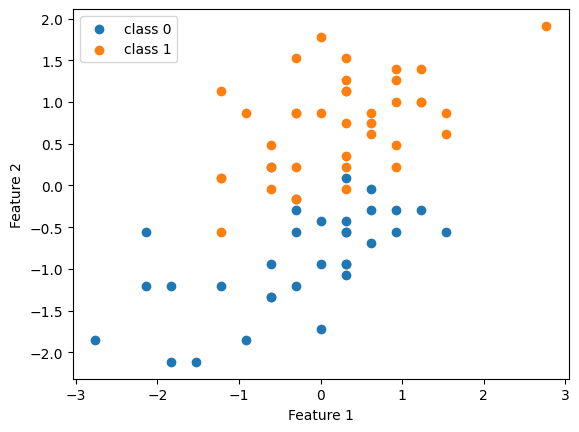

In [6]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

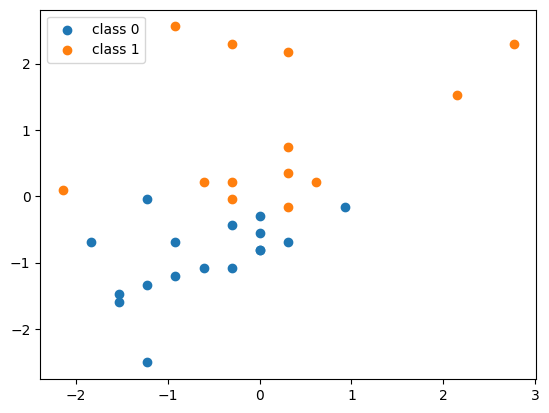

In [7]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], label='class 0')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], label='class 1')
plt.legend()
plt.show()

In [8]:
class Adaline():
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = torch.zeros(num_features, 1, dtype=torch.float)
    self.bias = torch.zeros(1, dtype=torch.float)

  def activation(self, x):
    return x

  def forward(self, x):
    netinputs = torch.add(torch.mm(x, self.weights), self.bias)
    return self.activation(netinputs).view(-1)

  def backward(self, x, yhat, y):
    grad_loss_yhat = 2*(yhat-y)
    grad_yhat_weights = x
    grad_yhat_bias = 1.

    grad_loss_weights = torch.mm(grad_yhat_weights.t(), grad_loss_yhat.view(-1,1)) / y.size(0)
    grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)

    return grad_loss_weights, grad_loss_bias

In [9]:
def loss(yhat, y):
  return torch.mean((yhat-y)**2)

def train(model, x, y, num_epochs, learning_rate=0.01, seed=123, minibatch_size=10):
  cost = []
  torch.manual_seed(seed)
  for e in range(num_epochs):

    # Shuffle epoch
    shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
    minibatches = torch.split(shuffle_idx, minibatch_size)

    for minibatch_idx in minibatches:
      yhat = model.forward(x[minibatch_idx])

      grad_w, grad_b = model.backward(x[minibatch_idx], yhat, y[minibatch_idx])

      model.weights -= learning_rate*grad_w
      model.bias -= learning_rate*grad_b

      minibatch_loss = loss(yhat, y[minibatch_idx])
      print(' Minibatch MSE: %.3f' % minibatch_loss)

    yhat = model.forward(x)
    curr_loss = loss(yhat, y)
    print('Epoch: %03d' % (e+1), end="")
    print(' | MSE: %.5f' % curr_loss)
    cost.append(curr_loss)

  return cost

In [10]:
model = Adaline(num_features=X_train.size(1))
cost = train(model,
             X_train, y_train.float(),
             num_epochs=20,
             learning_rate=0.1,
             seed=123,
             minibatch_size=10)

 Minibatch MSE: 0.500
 Minibatch MSE: 0.380
 Minibatch MSE: 0.359
 Minibatch MSE: 0.229
 Minibatch MSE: 0.124
 Minibatch MSE: 0.077
 Minibatch MSE: 0.170
Epoch: 001 | MSE: 0.11116
 Minibatch MSE: 0.132
 Minibatch MSE: 0.083
 Minibatch MSE: 0.203
 Minibatch MSE: 0.090
 Minibatch MSE: 0.072
 Minibatch MSE: 0.072
 Minibatch MSE: 0.057
Epoch: 002 | MSE: 0.08688
 Minibatch MSE: 0.148
 Minibatch MSE: 0.072
 Minibatch MSE: 0.084
 Minibatch MSE: 0.101
 Minibatch MSE: 0.092
 Minibatch MSE: 0.058
 Minibatch MSE: 0.061
Epoch: 003 | MSE: 0.08089
 Minibatch MSE: 0.125
 Minibatch MSE: 0.072
 Minibatch MSE: 0.046
 Minibatch MSE: 0.039
 Minibatch MSE: 0.096
 Minibatch MSE: 0.093
 Minibatch MSE: 0.109
Epoch: 004 | MSE: 0.07967
 Minibatch MSE: 0.136
 Minibatch MSE: 0.075
 Minibatch MSE: 0.065
 Minibatch MSE: 0.084
 Minibatch MSE: 0.085
 Minibatch MSE: 0.085
 Minibatch MSE: 0.056
Epoch: 005 | MSE: 0.08042
 Minibatch MSE: 0.092
 Minibatch MSE: 0.079
 Minibatch MSE: 0.040
 Minibatch MSE: 0.047
 Minibatch M

# Evaluate the ADALINE Model

### Plot Loss (MSE)

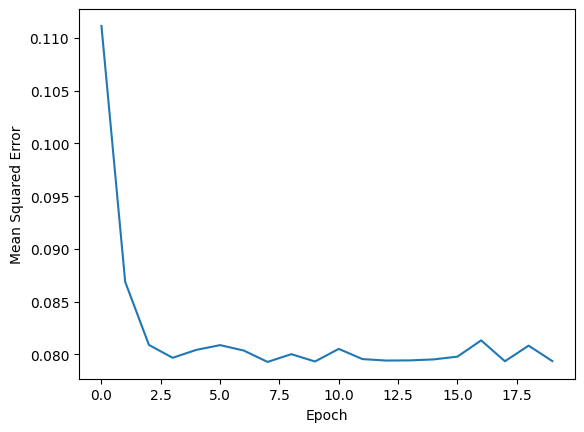

In [11]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [12]:
ones = torch.ones(y_train.size())
zeros = torch.zeros(y_train.size())
train_pred = model.forward(X_train)
train_acc = torch.mean(
    (torch.where(train_pred > 0.5,
                 ones,
                 zeros).int() == y_train).float())

ones = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())
test_pred = model.forward(X_test)
test_acc = torch.mean(
    (torch.where(test_pred > 0.5,
                 ones,
                 zeros).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Test Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 92.86
Test Accuracy: 93.33


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


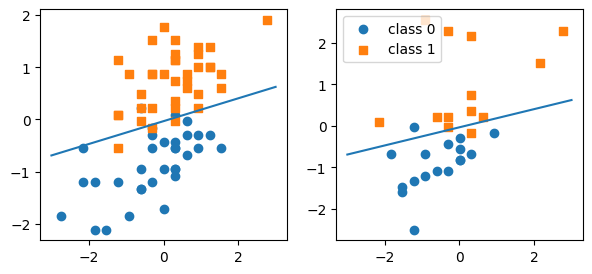

In [13]:
##########################
### 2D Decision Boundary
##########################

w, b = model.weights, model.bias - 0.5

x_min = -3
y_min = ( (-(w[0] * x_min) - b[0])
          / w[1] )

x_max = 3
y_max = ( (-(w[0] * x_max) - b[0])
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

# ADALINE with PyTorch Autograd

In [18]:
import torch
from torch.autograd import grad
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [21]:
# Using the same dataset
X.size(), y.size()

(torch.Size([100, 2]), torch.Size([100]))

In [22]:
X_train.size(), X_test.size()

(torch.Size([70, 2]), torch.Size([30, 2]))

In [23]:
y_train.size(), y_test.size()

(torch.Size([70]), torch.Size([30]))

In [24]:
class Adaline_auto(torch.nn.Module):
  def __init__(self, num_features):
    super(Adaline_auto, self).__init__()
    self.linear = torch.nn.Linear(num_features, 1)

  def forward(self, x):
    netinputs = self.linear(x)
    activations = netinputs
    return activations.view(-1)

  # Since we are using the Pytorch autograd function, we need not define a backward fxn
  # pytorch's autograd function does that for us

In [25]:
def train(model, x, y, num_epochs,
          learning_rate=0.01, seed=123, minibatch_size=10):
  cost = []
  torch.manual_seed(seed)
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  for e in range(num_epochs):
    shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
    minibatches = torch.split(shuffle_idx, minibatch_size)

    for minibatch_idx in minibatches:

      # compute outputs
      yhat = model.forward(x[minibatch_idx])
      # computing the loss, manual loss function can also be used instead
      loss = F.mse_loss(yhat, y[minibatch_idx])

      ## resetting the gradients from the previous iteration ##
      optimizer.zero_grad()

      ## compute the gradients using autograds backward utility function ##
      loss.backward()

      # update the weights
      optimizer.step()

    # using the no_grad() fxn to avoid the unnecessary computation cost
    # aboid building graph during 'inference' to save memory
    with torch.no_grad():
      yhat = model.forward(x)
      curr_loss = F.mse_loss(yhat, y)
      print('Epoch: %03d' % (e+1), end="")
      print(' | MSE: %.5f' % curr_loss)
      cost.append(curr_loss)
  return cost

In [26]:
model = Adaline_auto(num_features=X_train.size(1))
cost = train(model,
             X_train, y_train.float(),
             num_epochs=20,
             learning_rate=0.01,
             seed=123,
             minibatch_size=10)

Epoch: 001 | MSE: 0.12368
Epoch: 002 | MSE: 0.10931
Epoch: 003 | MSE: 0.09963
Epoch: 004 | MSE: 0.09326
Epoch: 005 | MSE: 0.08878
Epoch: 006 | MSE: 0.08577
Epoch: 007 | MSE: 0.08373
Epoch: 008 | MSE: 0.08240
Epoch: 009 | MSE: 0.08147
Epoch: 010 | MSE: 0.08082
Epoch: 011 | MSE: 0.08038
Epoch: 012 | MSE: 0.08005
Epoch: 013 | MSE: 0.07982
Epoch: 014 | MSE: 0.07965
Epoch: 015 | MSE: 0.07953
Epoch: 016 | MSE: 0.07944
Epoch: 017 | MSE: 0.07938
Epoch: 018 | MSE: 0.07932
Epoch: 019 | MSE: 0.07928
Epoch: 020 | MSE: 0.07925


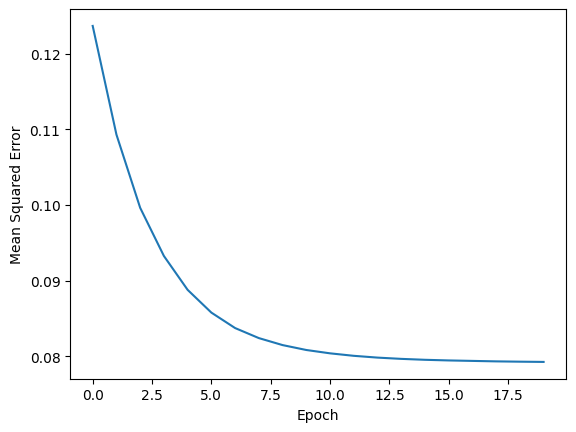

In [27]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [28]:
ones = torch.ones(y_train.size())
zeros = torch.zeros(y_train.size())
train_pred = model.forward(X_train)
train_acc = torch.mean(
    (torch.where(train_pred > 0.5,
                 ones,
                 zeros).int() == y_train).float())

ones = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())
test_pred = model.forward(X_test)
test_acc = torch.mean(
    (torch.where(test_pred > 0.5,
                 ones,
                 zeros).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Test Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 91.43
Test Accuracy: 93.33
